# Required Librarries

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder




# Step 1: Load the dataset

In [46]:

bank_data = pd.read_csv("bank.csv", sep=";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Step 2: Preprocess the data



In [47]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Statistical Analysis

In [48]:
bank_data.describe

<bound method NDFrame.describe of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  du

# Checking Missing values

In [49]:

bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Exploratory Data Analysis

C:\Users\shah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


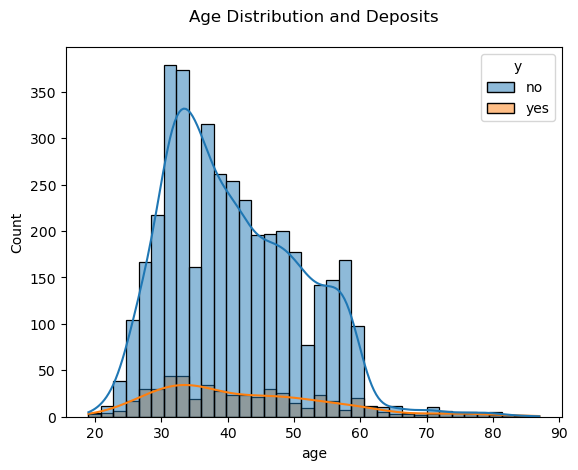

In [55]:

sns.histplot(x="age", data=bank_data, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()



### Distribution of Occupation

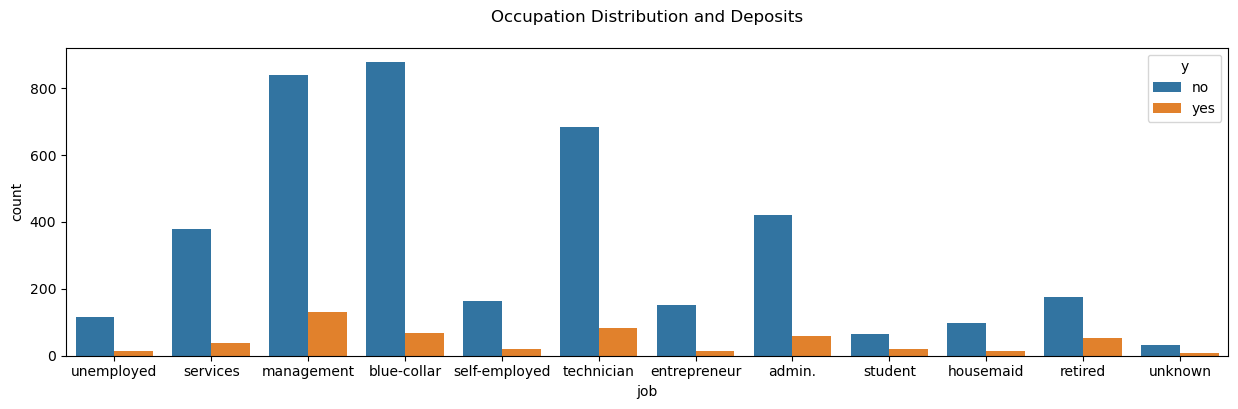

In [58]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank_data, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

# Distribution of Marital Status

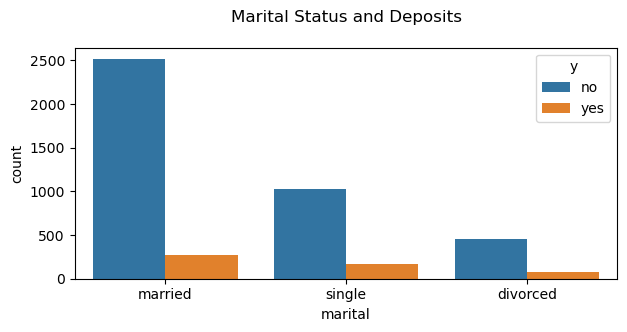

In [60]:

plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank_data, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

# Distribution of Outcome (Term Deposits)

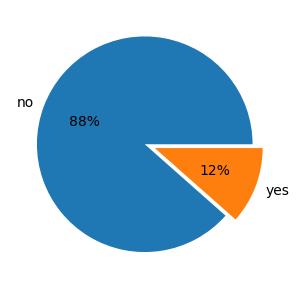

In [63]:

#Count of Outcome
bank_data.y.value_counts()
keys = bank_data.y.value_counts().index
data = bank_data.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

In [66]:
bank_data

,age,job,marital,education,default,balance,housing,loan,day,campaign,y
0,30,unemployed,married,primary,no,1787,no,no,19,1,no
1,33,services,married,secondary,no,4789,yes,yes,11,1,no
2,35,management,single,tertiary,no,1350,yes,no,16,1,no
3,30,management,married,tertiary,no,1476,yes,yes,3,4,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,1,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,30,5,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,1,no
4518,57,technician,married,secondary,no,295,no,no,19,11,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,4,no


In [67]:
# Encode categorical variables
label_encoder = LabelEncoder()
bank_data['job'] = label_encoder.fit_transform(bank_data['job'])
bank_data['marital'] = label_encoder.fit_transform(bank_data['marital'])
bank_data['education'] = label_encoder.fit_transform(bank_data['education'])
bank_data['default'] = label_encoder.fit_transform(bank_data['default'])
bank_data['housing'] = label_encoder.fit_transform(bank_data['housing'])
bank_data['loan'] = label_encoder.fit_transform(bank_data['loan'])

bank_data['y'] = label_encoder.fit_transform(bank_data['y'])



In [69]:
bank_data

,age,job,marital,education,default,balance,housing,loan,day,campaign,y
0,30,10,1,0,0,1787,0,0,19,1,0
1,33,7,1,1,0,4789,1,1,11,1,0
2,35,4,2,2,0,1350,1,0,16,1,0
3,30,4,1,2,0,1476,1,1,3,4,0
4,59,1,1,1,0,0,1,0,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,30,5,0
4517,57,6,1,2,1,-3313,1,1,9,1,0
4518,57,9,1,1,0,295,0,0,19,11,0
4519,28,1,1,1,0,1137,0,0,6,4,0


# Correlation Analysis using Heatmap

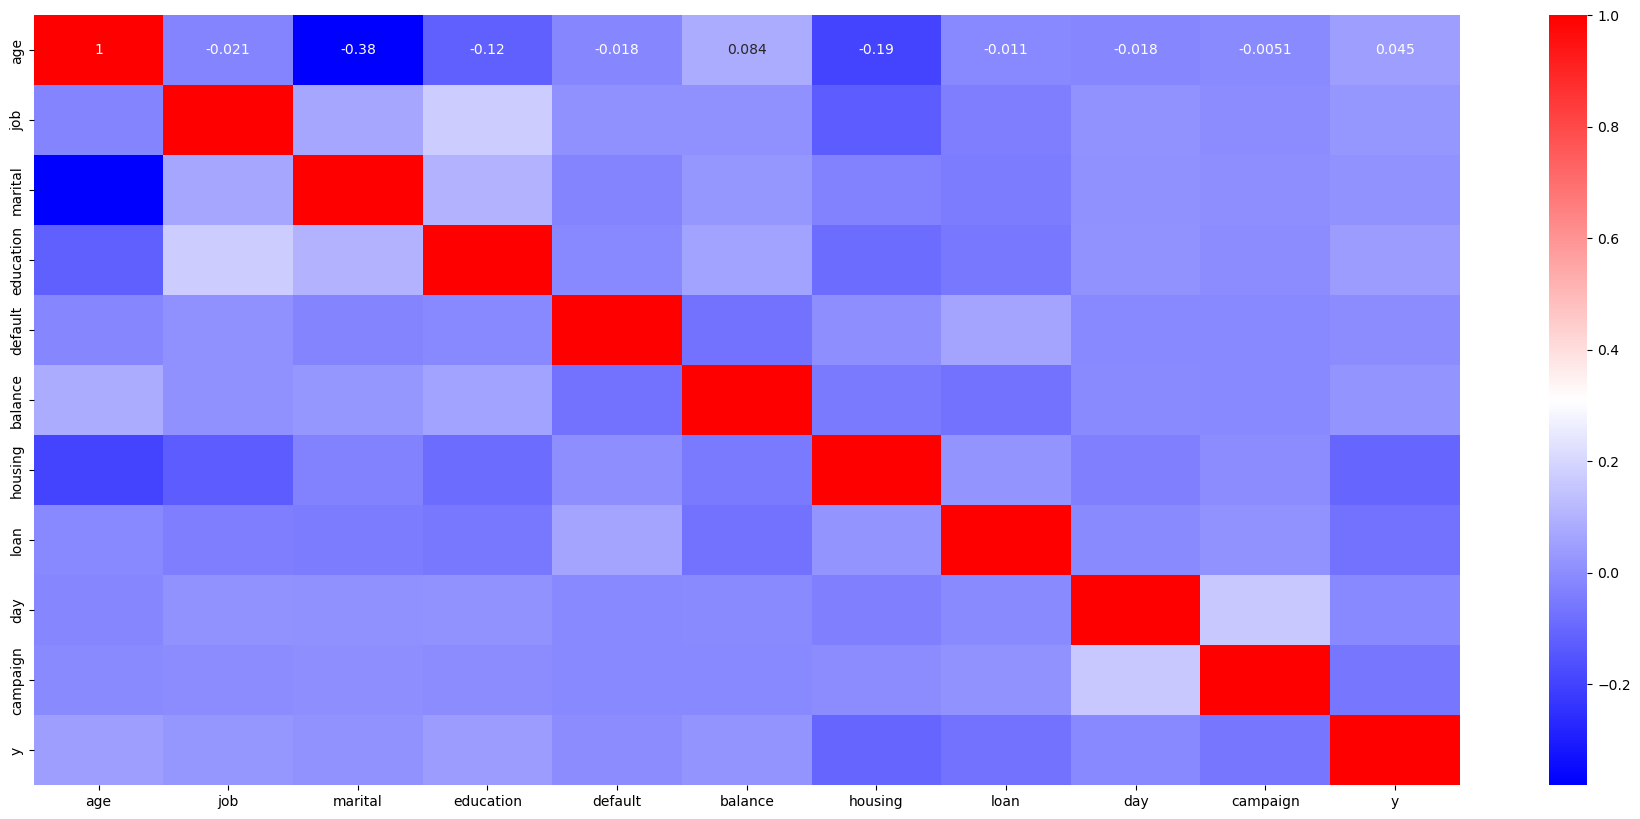

In [70]:

plt.figure(figsize=(23,10))
sns.heatmap(bank_data.corr(), cmap='bwr', annot=True)
plt.show()

# Step 3: Split the data into training and testing sets

In [27]:

X = bank_data.drop(columns=['y'])
y = bank_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 4: Train a decision tree classifier

In [28]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

# Step 5: Evaluate the classifier's performance

In [31]:

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7856353591160221

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       807
           1       0.13      0.17      0.15        98

    accuracy                           0.79       905
   macro avg       0.51      0.52      0.51       905
weighted avg       0.81      0.79      0.80       905


Confusion Matrix:
[[694 113]
 [ 81  17]]


# Visualizing the Tree

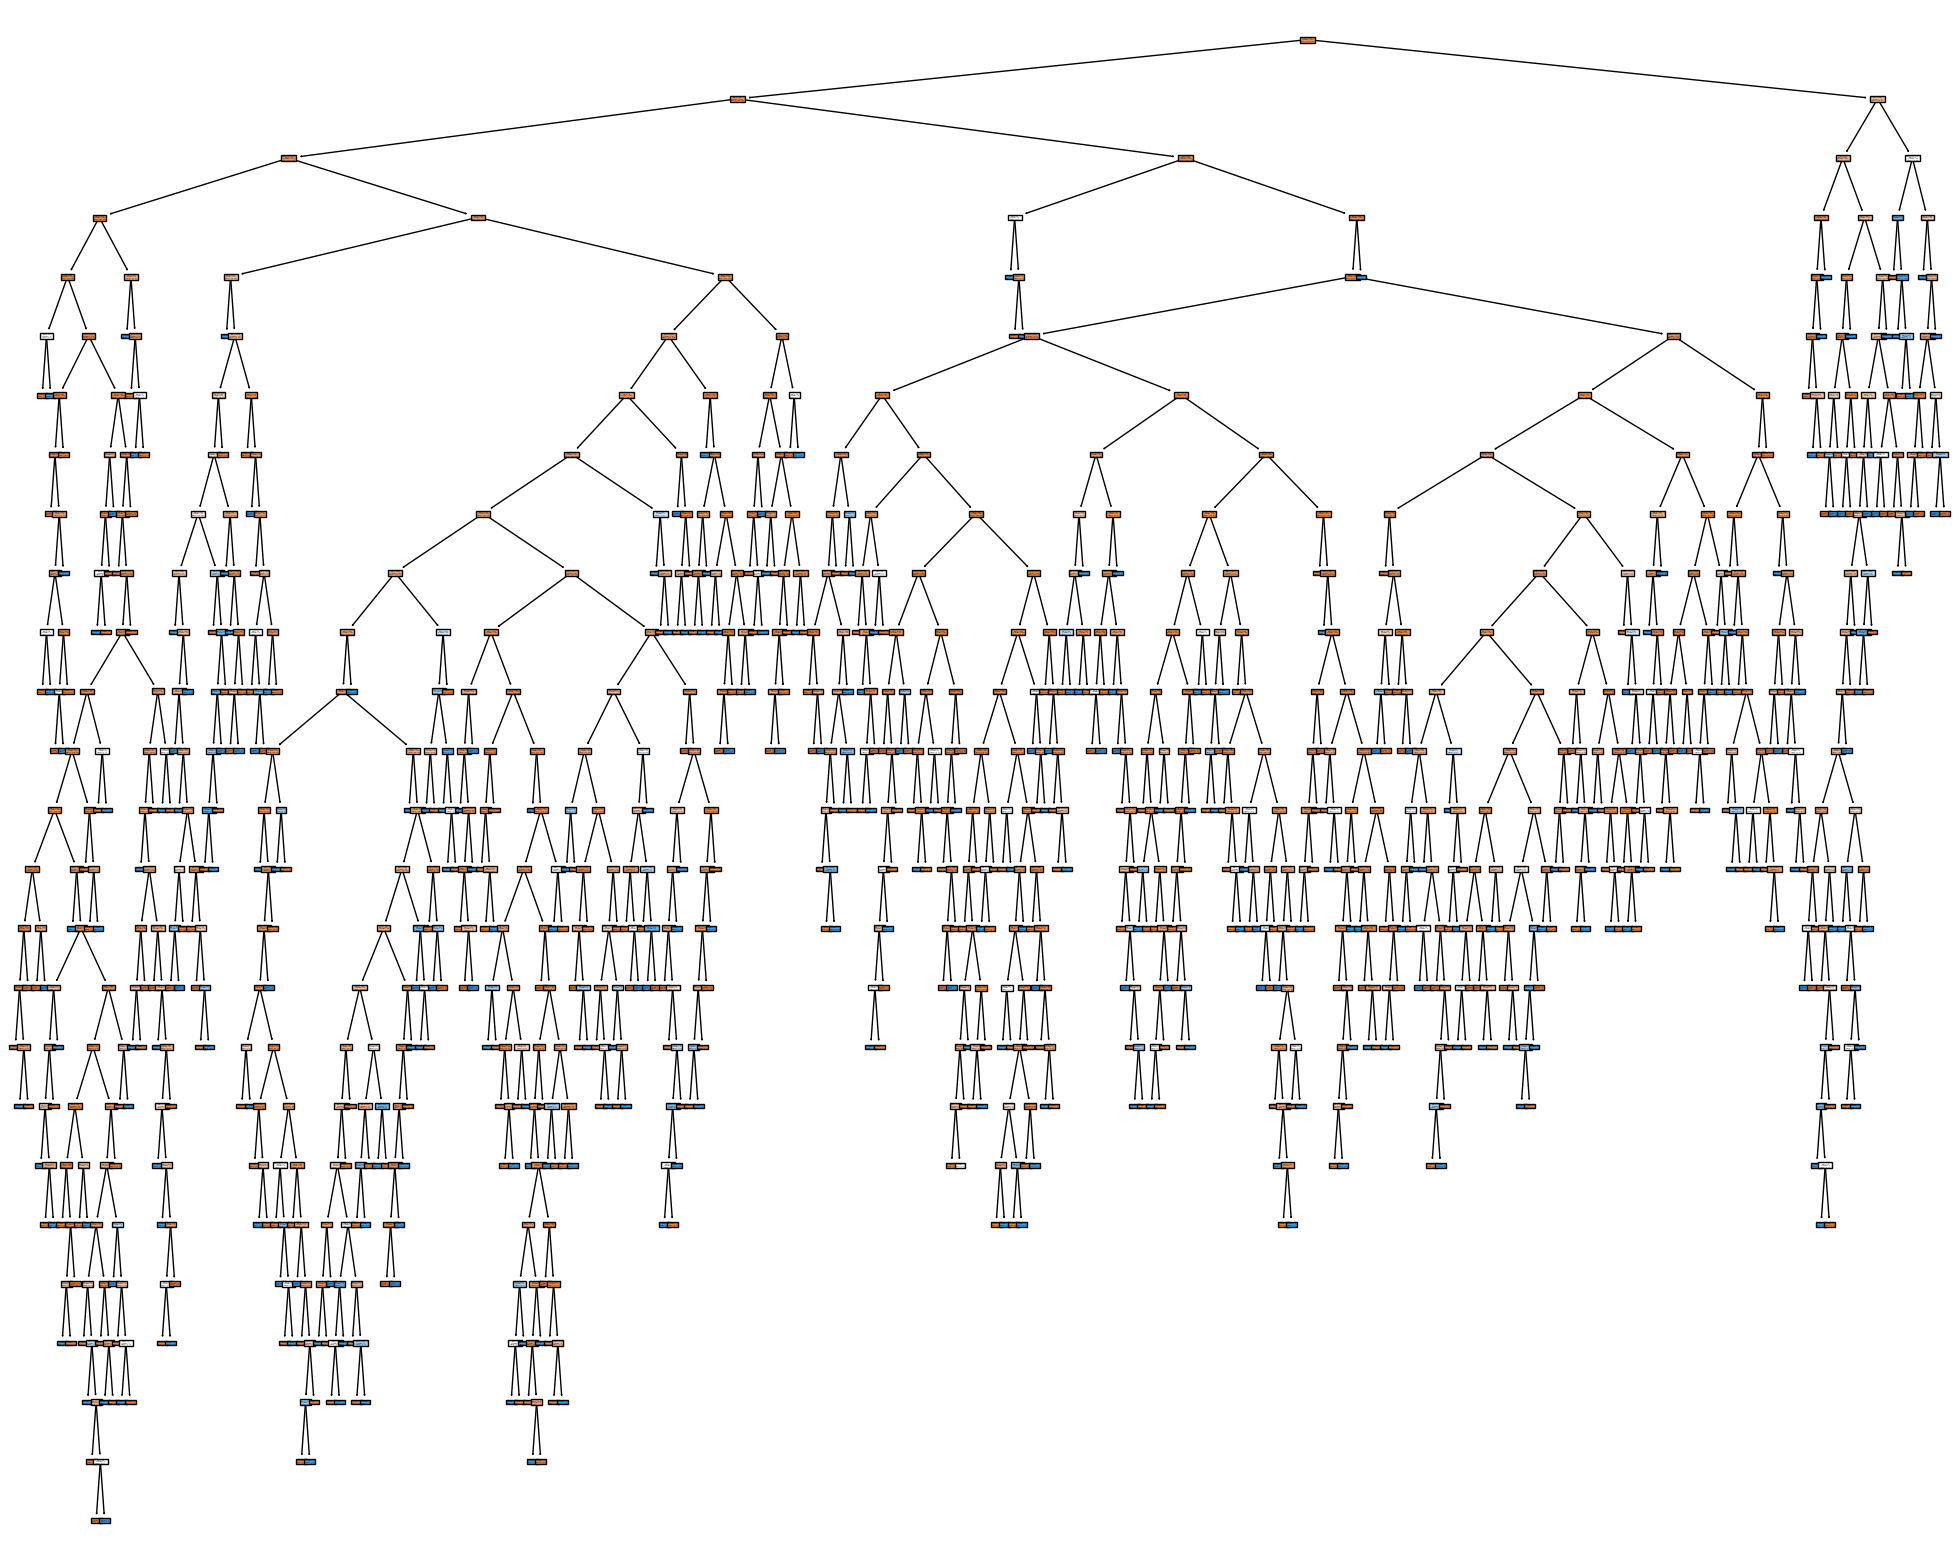

In [71]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)

# Visualize the Matrix

Accuracy: 0.7856353591160221

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       807
           1       0.13      0.17      0.15        98

    accuracy                           0.79       905
   macro avg       0.51      0.52      0.51       905
weighted avg       0.81      0.79      0.80       905


Confusion Matrix:
[[694 113]
 [ 81  17]]


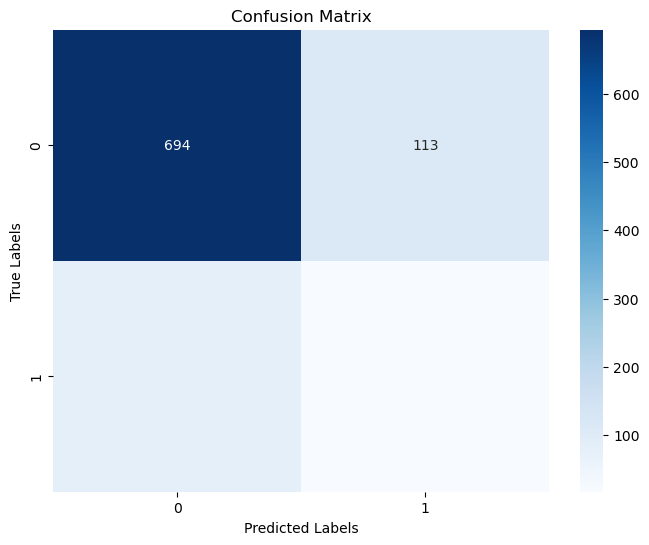

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 5: Evaluate the classifier's performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
